In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import h5py as h5
import nrrd

from mpi4py import MPI

In [3]:
pred_file = "/Volumes/data/BIIAX_model_01-lowres-2024-02-08/160_10-layer_00_uint8_predictions.h5"

# vol_file = "/Volumes/LaCie/scratch/200_10-layer/volumes/00/200_10-layer_00_uint8.h5"
assert  os.path.exists(pred_file)
# assert os.path.exists(vol_file)

In [3]:

vol = {}
with h5.File(os.path.join(vol_file),"r",driver='mpio', comm=MPI.COMM_WORLD) as f:
    # print(f.keys())
    for key in f.keys():
        # print(key)
        if key == "raw":
            vol[key] = f[key][:]
            # print(f[key].shape)
            # print(f[key].nbytes/1024**2)
            # print(f[key].dtype)

In [4]:

pred = {}
with h5.File(os.path.join(pred_file),"r",driver='mpio', comm=MPI.COMM_WORLD) as f:
    # print(f.keys())
    for key in f.keys():
        # print(key)
        if key == "predictions":
            pred[key] = f[key][:]
            # print(f[key].shape)
            # print(f[key].nbytes/1024**2)
            # print(f[key].dtype)

In [5]:
pred["labels"] = np.argmax(pred["predictions"][:,:,:,:],axis=0)

Text(0.5, 1.0, 'prediction (slice 200)')

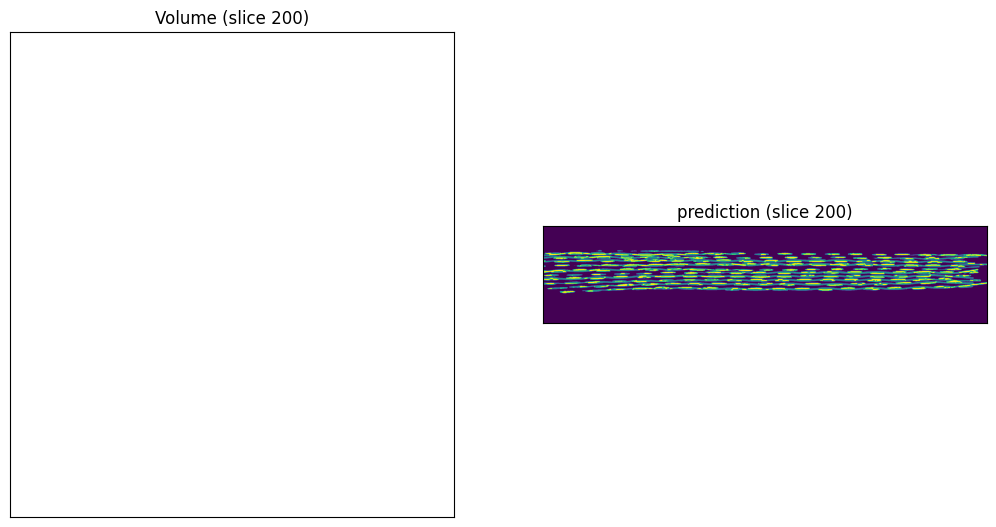

In [5]:
fig, axs = plt.subplots(1,2,figsize=(2*6.3,6.3))
axs = axs.flatten()

slice = 200

# axs[0].imshow(vol["raw"][:,slice,:],cmap="grey")
axs[1].imshow(pred["predictions"][:,slice,:])

for ax in axs: ax.set_xticks([]),ax.set_yticks([])
axs[0].set_title("Volume (slice %3.f)" %slice)
axs[1].set_title("prediction (slice %3.f)" %slice)